In [37]:
##决策树回归模型：对不同区间下的X的Y平均值进行预测
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [38]:
# 生成一些示例数据（假设X是自变量，y是因变量）
X = np.random.rand(100, 1)  # 生成100个随机样本
y = 2 * X.squeeze() + 1 + 0.1 * np.random.randn(100)  # 生成与X线性相关的因变量，并添加噪声

In [39]:
# 将数据分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
##测试集的比例为20%，random_state为设置随机种子
# 创建决策树回归模型
tree_regressor = DecisionTreeRegressor(max_depth=3)  # 你可以调整max_depth参数

In [40]:
# 在训练集上训练模型
tree_regressor.fit(X_train, y_train)
# 在测试集上进行预测
y_pred = tree_regressor.predict(X_test)

# 计算均方误差（Mean Squared Error）作为评估指标
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.019649583518451082


In [41]:
from sklearn.tree import export_text

tree_rules = export_text(tree_regressor, feature_names=['X'])
print(tree_rules)

|--- X <= 0.56
|   |--- X <= 0.24
|   |   |--- X <= 0.09
|   |   |   |--- value: [1.01]
|   |   |--- X >  0.09
|   |   |   |--- value: [1.31]
|   |--- X >  0.24
|   |   |--- X <= 0.42
|   |   |   |--- value: [1.65]
|   |   |--- X >  0.42
|   |   |   |--- value: [1.98]
|--- X >  0.56
|   |--- X <= 0.79
|   |   |--- X <= 0.67
|   |   |   |--- value: [2.17]
|   |   |--- X >  0.67
|   |   |   |--- value: [2.48]
|   |--- X >  0.79
|   |   |--- X <= 0.93
|   |   |   |--- value: [2.76]
|   |   |--- X >  0.93
|   |   |   |--- value: [2.96]


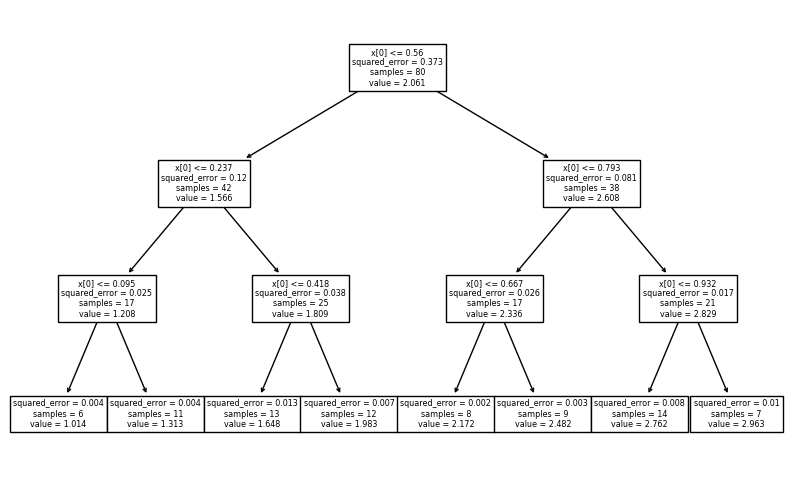

In [50]:
## 导出可视化的结果
from matplotlib import pyplot as plt
from sklearn import tree
plt.figure(figsize=(10, 6))  ##plt.figure 创建一个新的图形对象
tree.plot_tree(tree_regressor)
plt.savefig("decision_tree.png")
plt.show()